<a href="https://colab.research.google.com/github/juharrais/FIESC/blob/main/Questao2(a)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 2
Seja o conjunto de imagens satelitais associadas às regiões urbanas: https://drive.google.com/drive/folders/11zkRFiK8ts_gBBjBZ4lPogMmuAcMBKmf?usp=drive_link

(a) As imagens RGB img46.png, img47.png, img66.png e img67.png apresentam um silo, conforme indicado. Implemente um código responsável pela seleção dos conjuntos de pixels associados ao objeto silo.

(b) Considerando as imagens satelitais, das mesmas regiões acima, contendo 8 canais espectrais (arquivos .tiff), implemente algum método para segmentação da vegetação presente nas cenas.


In [ ]:
# Montar o Google Drive no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Instalação do OpenCV
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
img46 = cv2.imread('/content/drive/MyDrive/FIESC_Prova/Questão2/img46.png')
img47 = cv2.imread('/content/drive/MyDrive/FIESC_Prova/Questão2/img47.png')
img66 = cv2.imread('/content/drive/MyDrive/FIESC_Prova/Questão2/img66.png')
img67 = cv2.imread('/content/drive/MyDrive/FIESC_Prova/Questão2/img67.png')



# Lista de nomes de arquivo das imagens
image_filenames = [('/content/drive/MyDrive/FIESC_Prova/Questão2/img46.png'),
                  ('/content/drive/MyDrive/FIESC_Prova/Questão2/img47.png'),
                  ('/content/drive/MyDrive/FIESC_Prova/Questão2/img66.png'),
                  ('/content/drive/MyDrive/FIESC_Prova/Questão2/img67.png')]

# Crie uma lista para armazenar as imagens
images = []

# Carregue todas as imagens e adicione à lista
for filename in image_filenames:
    img = cv2.imread(filename)
    images.append(img)

# Agora, a lista "images" contém todas as imagens.


In [ ]:
threshold_value = 150


In [ ]:
def segment_silo(image, threshold_value):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_mask


In [ ]:
#Segmentacao em cada imagem: silo_mask_46 = segment_silo(img46, threshold_value)
silo_mask_47 = segment_silo(img47, threshold_value)
silo_mask_66 = segment_silo(img66, threshold_value)
silo_mask_67 = segment_silo(img67, threshold_value)


In [ ]:
# Função para segmentar o objeto silo
def segment_silo(image, threshold_value):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_mask

# Lista para armazenar as máscaras segmentadas
silo_masks = []

# Segmentação de cada imagem na lista
for img in images:
    mask = segment_silo(img, threshold_value)
    silo_masks.append(mask)

# Agora, a lista silo_masks contém as máscaras segmentadas de todas as imagens.

Para obter os conjuntos de pixels associados ao objeto silo,
 você pode usar a máscara binária para extrair esses pixels:


In [ ]:
def extract_silo_pixels(image, mask):
    return image[np.where(mask > 0)]

silo_pixels_46 = extract_silo_pixels(img46, silo_mask_46)
silo_pixels_47 = extract_silo_pixels(img47, silo_mask_47)
silo_pixels_66 = extract_silo_pixels(img66, silo_mask_66)
silo_pixels_67 = extract_silo_pixels(img67, silo_mask_67)


Este código calculará a média de cor (no espaço BGR) para cada conjunto de pixels associados ao objeto silo em cada imagem segmentada e exibirá as médias de cor para cada imagem.

In [ ]:


# Função para calcular a média da cor dos pixels
def calcular_media_cor(pixels):
    if len(pixels) == 0:
        return None
    pixels = np.array(pixels)
    media_cor = np.mean(pixels, axis=0)
    return media_cor

# Calcular a média da cor para cada conjunto de pixels
media_cor_46 = calcular_media_cor(silo_pixels_46)
media_cor_47 = calcular_media_cor(silo_pixels_47)
media_cor_66 = calcular_media_cor(silo_pixels_66)
media_cor_67 = calcular_media_cor(silo_pixels_67)

# Exibir as médias de cor
print("Média de cor para img46:", media_cor_46)
print("Média de cor para img47:", media_cor_47)
print("Média de cor para img66:", media_cor_66)
print("Média de cor para img67:", media_cor_67)


Média de cor para img46: [205.72340426 210.72309136 208.13954944]
Média de cor para img47: [180.45522731 192.65880912 198.9248431 ]
Média de cor para img66: [190.59503972 210.10288704 215.92637086]
Média de cor para img67: [187.68840408 193.8781124  202.83613944]


 Processamento das imagens e exibição da seleção


In [ ]:
# Função para segmentar o objeto silo
def segment_silo(image, threshold_value):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_mask

# Lista para armazenar as máscaras segmentadas
silo_masks = []

In [ ]:
# Segmentação de cada imagem na lista
for img in images:
    mask = segment_silo(img, threshold_value)
    silo_masks.append(mask)

# Agora, a lista silo_masks contém as máscaras segmentadas de todas as imagens.


Neste código, percorremos cada imagem na lista images, aplicamos a função segment_silo a cada uma delas e armazenamos as máscaras resultantes na lista silo_masks. No final do loop, silo_masks conterá as máscaras segmentadas de todas as imagens da lista images. Certifique-se de ajustar o caminho dos arquivos de imagem ou carregar as imagens da maneira que preferir.

In [ ]:
# Função para desenhar a seleção do objeto silo na imagem original
def desenhar_selecao_silo(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

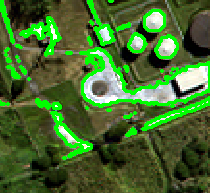

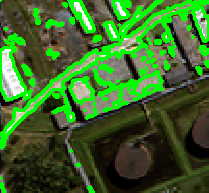

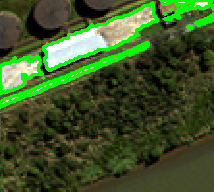

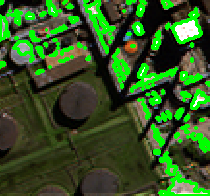

In [ ]:
# Exibir as seleções nas imagens originais
from google.colab.patches import cv2_imshow

# Exibir as seleções nas imagens originais
for i in range(len(images)):
    img = images[i].copy()  # Faça uma cópia da imagem original
    mask = silo_masks[i]    # Obtenha a máscara correspondente
    desenhar_selecao_silo(img, mask)

    # Exiba a imagem com a seleção usando cv2_imshow
    cv2_imshow(img)

In [ ]:
# Função para desenhar a seleção do objeto silo na imagem original
def desenhar_selecao_silo(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)


In [ ]:
# Exibir as imagens e permitir desenhar manualmente nas imagens originais
for i in range(len(images)):
    img = images[i].copy()  # Faça uma cópia da imagem original
    mask = silo_masks[i]    # Obtenha a máscara correspondente
    desenhar_selecao_silo(img, mask)

    # Crie uma janela interativa para desenhar
    cv2.namedWindow(f'Seleção em img{i + 1}', cv2.WINDOW_NORMAL)
    cv2.imshow(f'Seleção em img{i + 1}', img)

    # Aguarde até que uma tecla seja pressionada e feche a janela quando terminar
    cv2.waitKey(0)
    cv2.destroyWindow(f'Seleção em img{i + 1}')

IndentationError: ignored